# Jyotiprakash Jena
## Task2 - Prediction using Unsupervised ML

In [39]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


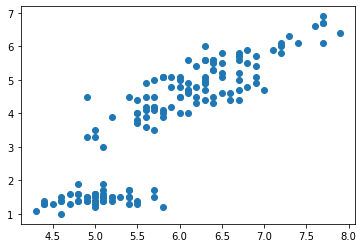

In [40]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])

In [41]:
from sklearn.model_selection import train_test_split

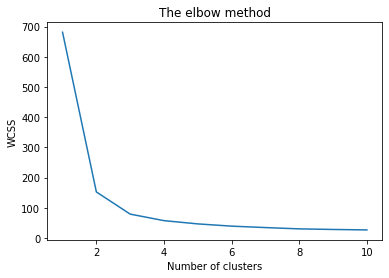

In [42]:
# using elbow method to find the optimum number of clusters
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters = k, random_state = 0)
    km.fit(iris_df)
    wcss.append(km.inertia_)

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [43]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_predict = kmeans.fit_predict(x)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [44]:
iris_df['cluster'] = y_predict
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [45]:
# Applying kmeans to the dataset / Creating the kmeans classifier
df1 = iris_df[iris_df.cluster==0]
df2 = iris_df[iris_df.cluster==1]
df3 = iris_df[iris_df.cluster==2]

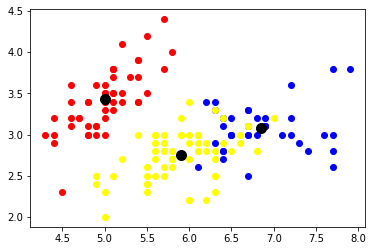

In [46]:
# Visualising the clusters
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'],color='yellow')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, color = 'black', label = 'Centroids')